In [1]:
from thesis import METRICS_PATH
import pandas as pd
metrics_path = METRICS_PATH
df = pd.read_csv(metrics_path)

In [2]:
df

,model,dataset,experiment_name,perturbation,dose,DEGs,r2mean,r2mean_top20,r2mean_top100,r2mean_top20_boostrap_mean,r2mean_top100_boostrap_mean,cell_type_test,average_mean_expressed_diff,average_fractions_diff,average_mean_degs20_diff,average_mean_degs100_diff
0,ButterflyPipeline,PbmcPipeline,NaN,ifn-b,0.0,61,0.937,0.941,0.986,0.954907,0.938905,CD4T,0.887969,0.284735,0.289858,0.656197
1,ButterflyPipeline,PbmcPipeline,NaN,ifn-b,0.0,74,0.974,0.970,0.941,0.964150,0.969834,CD14+Mono,0.880809,0.171740,0.061008,0.339943
2,ButterflyPipeline,PbmcPipeline,NaN,ifn-b,0.0,54,0.850,0.918,0.927,0.937235,0.906054,B,0.878579,0.283226,0.358259,0.675000
3,ButterflyPipeline,PbmcPipeline,NaN,ifn-b,0.0,87,0.980,0.978,0.976,0.971988,0.975125,FCGR3A+Mono,0.882943,0.136971,0.095720,0.404555
4,ButterflyPipeline,PbmcPipeline,NaN,ifn-b,0.0,59,0.854,0.927,0.929,0.930028,0.780989,NK,0.897270,0.353684,0.403392,0.656524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,ScGenPipeline,NaultPipeline,NaN,NaN,30.0,5,0.792,0.607,0.523,0.794005,0.650467,T Cells,0.904304,0.813766,0.724574,0.749347
288,ScGenPipeline,NaultPipeline,NaN,NaN,30.0,5,0.654,0.504,0.360,0.347726,0.326598,Subtype 1,0.881350,0.786780,0.672200,0.737061
289,ScGenPipeline,NaultPipeline,NaN,NaN,30.0,6,0.805,0.461,0.378,0.369870,0.475551,Stellate Cells,0.824407,0.747411,0.695436,0.629329
290,ScGenPipeline,NaultPipeline,NaN,NaN,10.0,9,0.929,0.922,0.968,0.965469,0.914741,Portal Fibroblasts,0.865139,0.723977,0.598879,0.718115


In [7]:
df_nault_dosage30 = df[(df['dataset'] == 'NaultPipeline') & (df['dose'] == 30)]
df_nault_dosage30

,model,dataset,experiment_name,perturbation,dose,DEGs,r2mean,r2mean_top20,r2mean_top100,r2mean_top20_boostrap_mean,r2mean_top100_boostrap_mean,cell_type_test,average_mean_expressed_diff,average_fractions_diff,average_mean_degs20_diff,average_mean_degs100_diff
108,ButterflyPipeline,NaultPipeline,NaN,NaN,30.0,54,0.861,0.839,0.951,0.952687,0.827577,Hepatocytes - portal,0.732932,0.273329,0.145444,0.310373
114,ButterflyPipeline,NaultPipeline,NaN,NaN,30.0,55,0.916,0.920,0.956,0.920075,0.917344,Hepatocytes - central,0.786005,0.247208,0.162103,0.333629
115,ButterflyPipeline,NaultPipeline,NaN,NaN,30.0,2,0.627,0.359,0.282,0.192315,0.256376,Subtype 1,0.794083,0.372190,0.569063,0.621165
116,ScPreGanPipeline,NaultPipeline,NaN,NaN,30.0,8,0.358,0.378,0.134,0.259398,0.367029,Portal Fibroblasts,0.651185,0.235545,0.610727,0.588424
117,ButterflyPipeline,NaultPipeline,NaN,NaN,30.0,17,0.529,0.204,0.088,0.071428,0.049660,B Cells,0.869485,0.316219,0.488952,0.634349
118,ButterflyPipeline,NaultPipeline,NaN,NaN,30.0,5,0.269,0.034,0.019,0.009574,0.024428,Endothelial Cells,0.818549,0.390372,0.787513,0.718843
119,ButterflyPipeline,NaultPipeline,NaN,NaN,30.0,3,0.348,0.460,0.271,0.217132,0.327106,Macrophage,0.851314,0.271883,0.789421,0.811665
120,ButterflyPipeline,NaultPipeline,NaN,NaN,30.0,8,0.545,0.284,0.023,0.200845,0.149109,Cholangiocytes,0.794335,0.483132,0.632039,0.676488
121,ButterflyPipeline,NaultPipeline,NaN,NaN,30.0,1,0.546,0.088,0.001,0.148196,0.546246,Neutrophils,0.862210,0.398350,0.649119,0.690887
122,ButterflyPipeline,NaultPipeline,NaN,NaN,30.0,4,0.367,0.316,0.029,0.021870,0.275323,Portal Fibroblasts,0.794838,0.483191,0.638030,0.668429


In [15]:
df_buttrefly = df_nault_dosage30[df_nault_dosage30['model'] == 'ButterflyPipeline']
df_scpregan = df_nault_dosage30[df_nault_dosage30['model'] == 'ScPreGanPipeline']
df_scgen = df_nault_dosage30[df_nault_dosage30['model'] == 'ScGenPipeline']

In [16]:
df_buttrefly

,model,dataset,experiment_name,perturbation,dose,DEGs,r2mean,r2mean_top20,r2mean_top100,r2mean_top20_boostrap_mean,r2mean_top100_boostrap_mean,cell_type_test,average_mean_expressed_diff,average_fractions_diff,average_mean_degs20_diff,average_mean_degs100_diff
108,ButterflyPipeline,NaultPipeline,NaN,NaN,30.0,54,0.861,0.839,0.951,0.952687,0.827577,Hepatocytes - portal,0.732932,0.273329,0.145444,0.310373
114,ButterflyPipeline,NaultPipeline,NaN,NaN,30.0,55,0.916,0.920,0.956,0.920075,0.917344,Hepatocytes - central,0.786005,0.247208,0.162103,0.333629
115,ButterflyPipeline,NaultPipeline,NaN,NaN,30.0,2,0.627,0.359,0.282,0.192315,0.256376,Subtype 1,0.794083,0.372190,0.569063,0.621165
117,ButterflyPipeline,NaultPipeline,NaN,NaN,30.0,17,0.529,0.204,0.088,0.071428,0.049660,B Cells,0.869485,0.316219,0.488952,0.634349
118,ButterflyPipeline,NaultPipeline,NaN,NaN,30.0,5,0.269,0.034,0.019,0.009574,0.024428,Endothelial Cells,0.818549,0.390372,0.787513,0.718843
119,ButterflyPipeline,NaultPipeline,NaN,NaN,30.0,3,0.348,0.460,0.271,0.217132,0.327106,Macrophage,0.851314,0.271883,0.789421,0.811665
120,ButterflyPipeline,NaultPipeline,NaN,NaN,30.0,8,0.545,0.284,0.023,0.200845,0.149109,Cholangiocytes,0.794335,0.483132,0.632039,0.676488
121,ButterflyPipeline,NaultPipeline,NaN,NaN,30.0,1,0.546,0.088,0.001,0.148196,0.546246,Neutrophils,0.862210,0.398350,0.649119,0.690887
122,ButterflyPipeline,NaultPipeline,NaN,NaN,30.0,4,0.367,0.316,0.029,0.021870,0.275323,Portal Fibroblasts,0.794838,0.483191,0.638030,0.668429
123,ButterflyPipeline,NaultPipeline,NaN,NaN,30.0,8,0.471,0.118,0.166,0.207986,0.097221,Stellate Cells,0.797177,0.511312,0.674374,0.630887


In [17]:
df_scgen

,model,dataset,experiment_name,perturbation,dose,DEGs,r2mean,r2mean_top20,r2mean_top100,r2mean_top20_boostrap_mean,r2mean_top100_boostrap_mean,cell_type_test,average_mean_expressed_diff,average_fractions_diff,average_mean_degs20_diff,average_mean_degs100_diff
260,ScGenPipeline,NaultPipeline,NaN,NaN,30.0,18,0.874,0.824,0.787,0.755923,0.775579,B Cells,0.911220,0.797759,0.659196,0.730443
261,ScGenPipeline,NaultPipeline,NaN,NaN,30.0,3,0.801,0.738,0.604,0.724090,0.733856,Portal Fibroblasts,0.813467,0.781009,0.683932,0.664887
279,ScGenPipeline,NaultPipeline,NaN,NaN,30.0,10,0.874,0.736,0.506,0.772196,0.736522,Endothelial Cells,0.872007,0.760205,0.554157,0.617594
280,ScGenPipeline,NaultPipeline,NaN,NaN,30.0,15,0.743,0.808,0.914,0.928952,0.806645,Hepatocytes - central,0.795680,0.799426,0.561164,0.566254
281,ScGenPipeline,NaultPipeline,NaN,NaN,30.0,0,0.487,0.664,0.607,0.471451,0.498277,Macrophage,0.907389,0.749742,0.768405,0.810641
285,ScGenPipeline,NaultPipeline,NaN,NaN,30.0,7,0.612,0.130,0.016,0.116293,0.646920,Neutrophils,0.897118,0.846068,0.754890,0.747197
286,ScGenPipeline,NaultPipeline,NaN,NaN,30.0,15,0.823,0.776,0.899,0.899070,0.752960,Hepatocytes - portal,0.845089,0.789974,0.515843,0.569694
287,ScGenPipeline,NaultPipeline,NaN,NaN,30.0,5,0.792,0.607,0.523,0.794005,0.650467,T Cells,0.904304,0.813766,0.724574,0.749347
288,ScGenPipeline,NaultPipeline,NaN,NaN,30.0,5,0.654,0.504,0.360,0.347726,0.326598,Subtype 1,0.881350,0.786780,0.672200,0.737061
289,ScGenPipeline,NaultPipeline,NaN,NaN,30.0,6,0.805,0.461,0.378,0.369870,0.475551,Stellate Cells,0.824407,0.747411,0.695436,0.629329


In [21]:
df_scgen

,model,dataset,experiment_name,perturbation,dose,DEGs,r2mean,r2mean_top20,r2mean_top100,r2mean_top20_boostrap_mean,r2mean_top100_boostrap_mean,cell_type_test,average_mean_expressed_diff,average_fractions_diff,average_mean_degs20_diff,average_mean_degs100_diff
260,ScGenPipeline,NaultPipeline,NaN,NaN,30.0,18,0.874,0.824,0.787,0.755923,0.775579,B Cells,0.911220,0.797759,0.659196,0.730443
261,ScGenPipeline,NaultPipeline,NaN,NaN,30.0,3,0.801,0.738,0.604,0.724090,0.733856,Portal Fibroblasts,0.813467,0.781009,0.683932,0.664887
279,ScGenPipeline,NaultPipeline,NaN,NaN,30.0,10,0.874,0.736,0.506,0.772196,0.736522,Endothelial Cells,0.872007,0.760205,0.554157,0.617594
280,ScGenPipeline,NaultPipeline,NaN,NaN,30.0,15,0.743,0.808,0.914,0.928952,0.806645,Hepatocytes - central,0.795680,0.799426,0.561164,0.566254
281,ScGenPipeline,NaultPipeline,NaN,NaN,30.0,0,0.487,0.664,0.607,0.471451,0.498277,Macrophage,0.907389,0.749742,0.768405,0.810641
285,ScGenPipeline,NaultPipeline,NaN,NaN,30.0,7,0.612,0.130,0.016,0.116293,0.646920,Neutrophils,0.897118,0.846068,0.754890,0.747197
286,ScGenPipeline,NaultPipeline,NaN,NaN,30.0,15,0.823,0.776,0.899,0.899070,0.752960,Hepatocytes - portal,0.845089,0.789974,0.515843,0.569694
287,ScGenPipeline,NaultPipeline,NaN,NaN,30.0,5,0.792,0.607,0.523,0.794005,0.650467,T Cells,0.904304,0.813766,0.724574,0.749347
288,ScGenPipeline,NaultPipeline,NaN,NaN,30.0,5,0.654,0.504,0.360,0.347726,0.326598,Subtype 1,0.881350,0.786780,0.672200,0.737061
289,ScGenPipeline,NaultPipeline,NaN,NaN,30.0,6,0.805,0.461,0.378,0.369870,0.475551,Stellate Cells,0.824407,0.747411,0.695436,0.629329


In [26]:
len(df_nault_dosage30['cell_type_test'].unique().tolist())

11

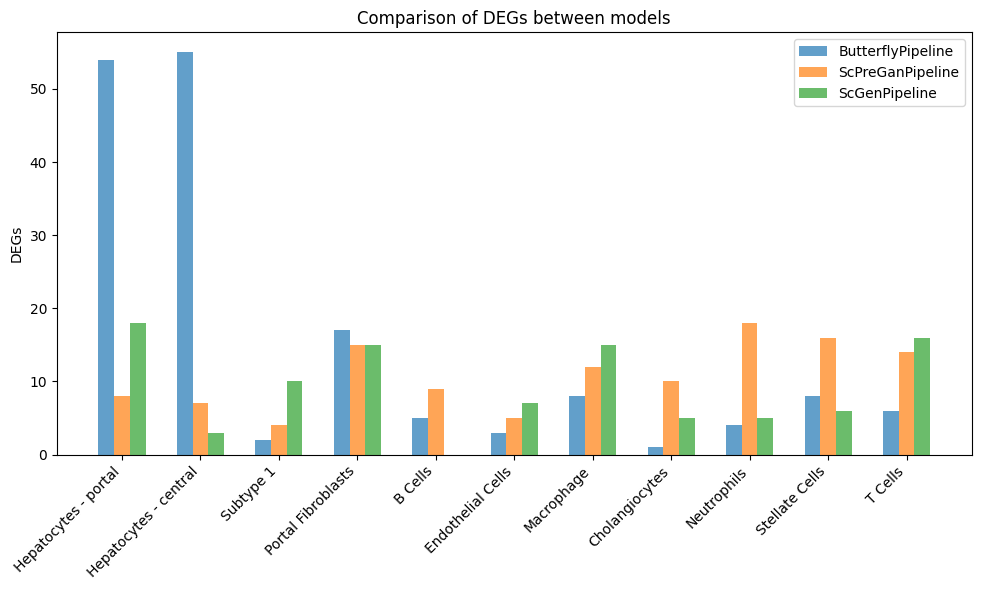

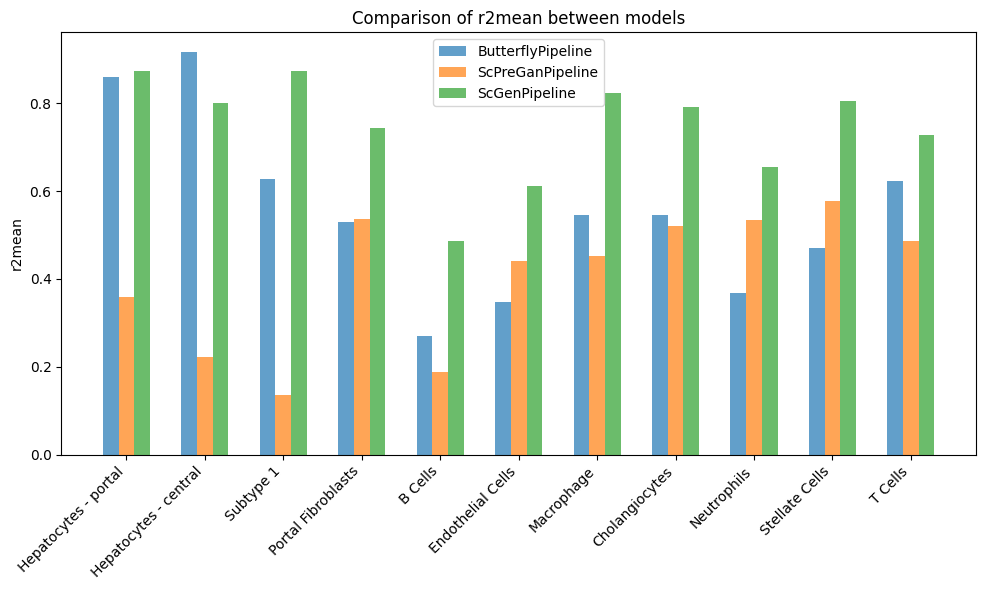

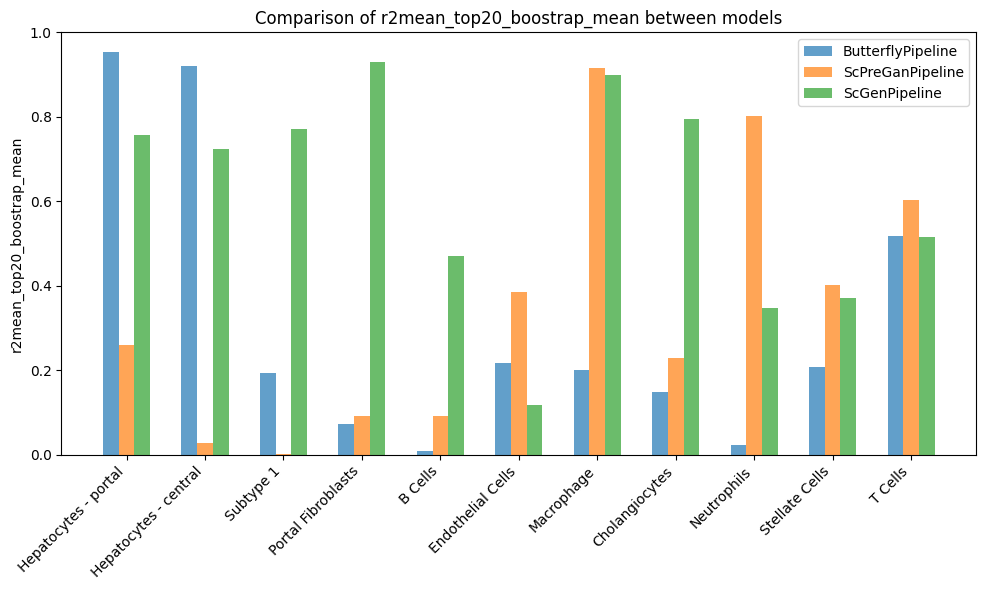

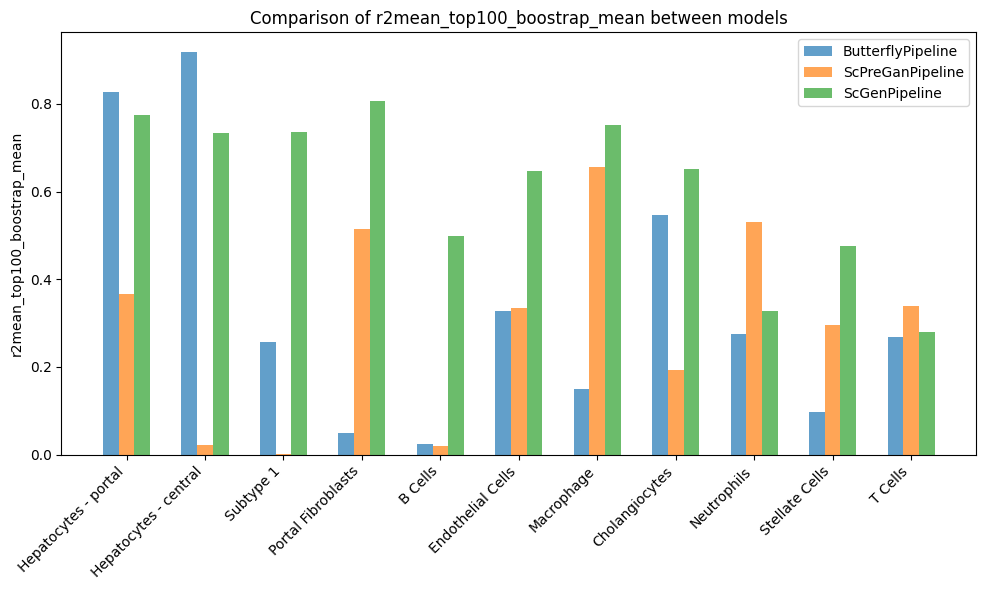

In [29]:
import numpy as np
import matplotlib.pyplot as plt

cell_types = df_nault_dosage30['cell_type_test'].unique().tolist()
# Define the positions for the bars
x = np.arange(len(cell_types))  # label locations
width = 0.2  # width of the bars for each model


# Iterate over each metric
for metric in ["DEGs", "r2mean", "r2mean_top20_boostrap_mean", "r2mean_top100_boostrap_mean"]:
    plt.figure(figsize=(10, 6))

    # Plot each model’s bars at slightly different x positions to avoid overlap
    plt.bar(x - width, df_buttrefly[metric], width, label='ButterflyPipeline', alpha=0.7)
    plt.bar(x, df_scpregan[metric], width, label='ScPreGanPipeline', alpha=0.7)
    plt.bar(x + width, df_scgen[metric], width, label='ScGenPipeline', alpha=0.7)

    # Labeling and formatting
    plt.xticks(x, cell_types, rotation=45, ha='right')
    plt.ylabel(metric)
    plt.title(f"Comparison of {metric} between models")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series



def plot_metrics(dataset: Series, title: str):
    df_buttrefly = dataset[dataset['model'] == 'ButterflyPipeline']
    df_scpregan = dataset[dataset['model'] == 'ScPreGanPipeline']
    df_scgen = dataset[dataset['model'] == 'ScGenPipeline']
    
    # Define unique cell types and bar positions
    cell_types = dataset['cell_type_test'].unique().tolist()
    x = np.arange(len(cell_types))  # Label locations
    width = 0.2  # Width of the bars for each model

    # List of metrics to plot
    metrics = ["DEGs", "r2mean", "r2mean_top20_boostrap_mean", "r2mean_top100_boostrap_mean"]

    # Create a 2x2 grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Adjust size as needed
    axes = axes.flatten()  # Flatten to easily iterate over axes

    # Plot each metric on a different subplot
    for i, metric in enumerate(metrics):
        ax = axes[i]

        # Plot each model’s bars at slightly different x positions
        bar1 = ax.bar(x - width, df_buttrefly[metric], width, label='ButterflyPipeline', alpha=0.7)
        bar2 = ax.bar(x, df_scpregan[metric], width, label='ScPreGanPipeline', alpha=0.7)
        bar3 = ax.bar(x + width, df_scgen[metric], width, label='ScGenPipeline', alpha=0.7)

        # Labeling and formatting
        ax.set_xticks(x)
        ax.set_xticklabels(cell_types, rotation=45, ha='right')
        ax.set_ylabel(metric)
        ax.set_title(f"Comparison of {metric}")

    # Set up a single legend by grabbing handles and labels from one of the subplots
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)
    fig.suptitle(title)

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space at the top for the legend
    plt.show()
    


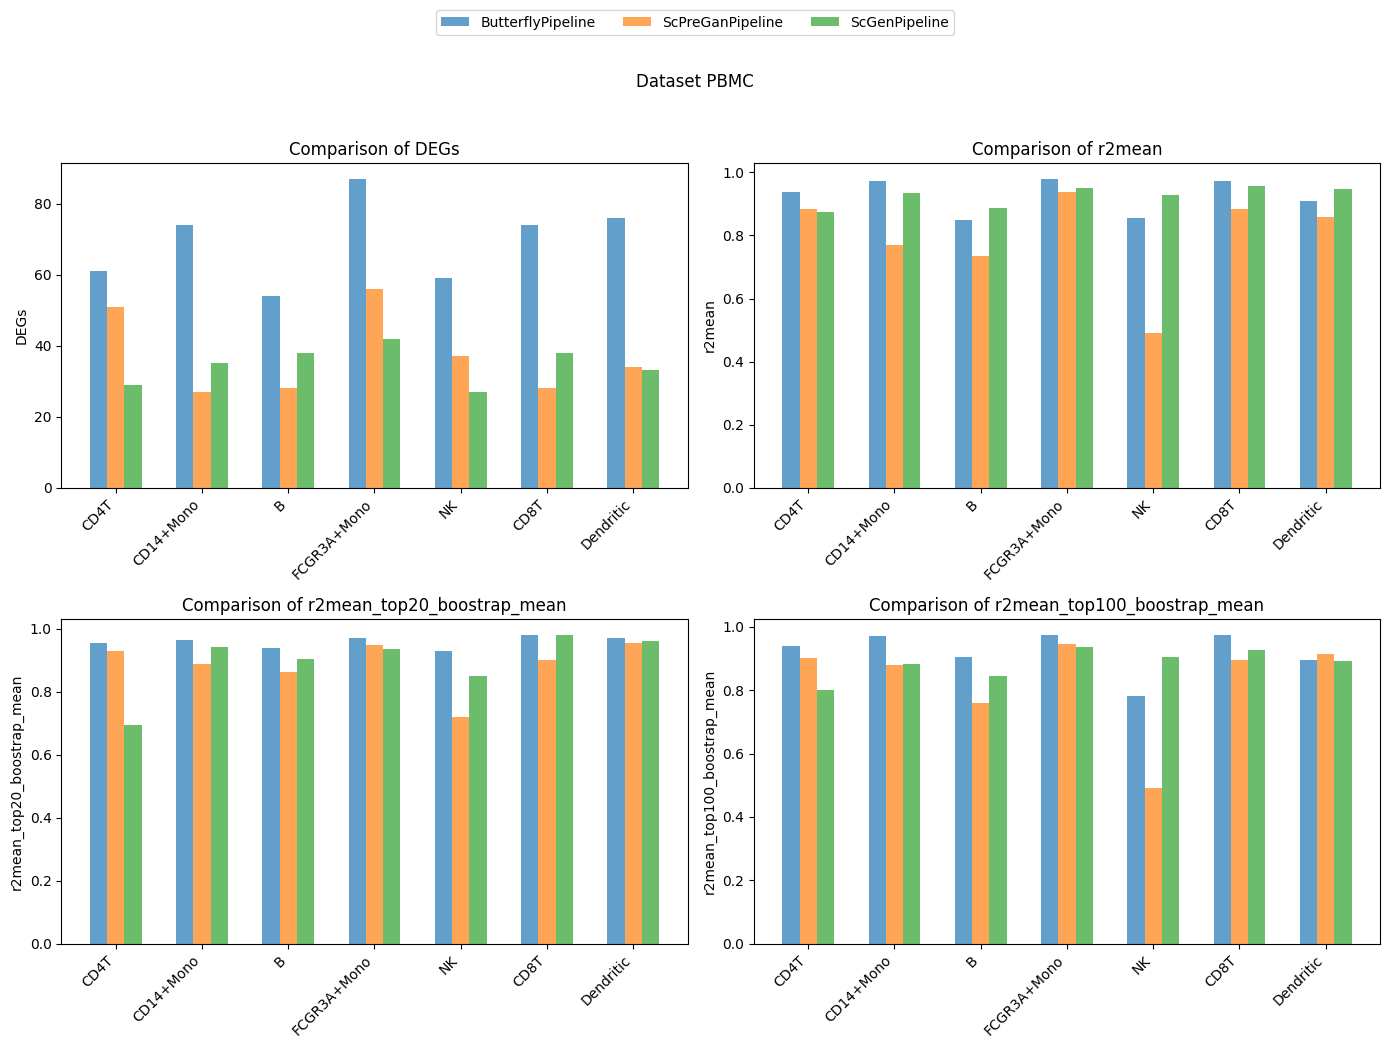

In [39]:
df_pbmc = df[df['dataset'] == 'PbmcPipeline']
plot_metrics(df_pbmc, 'Dataset PBMC')

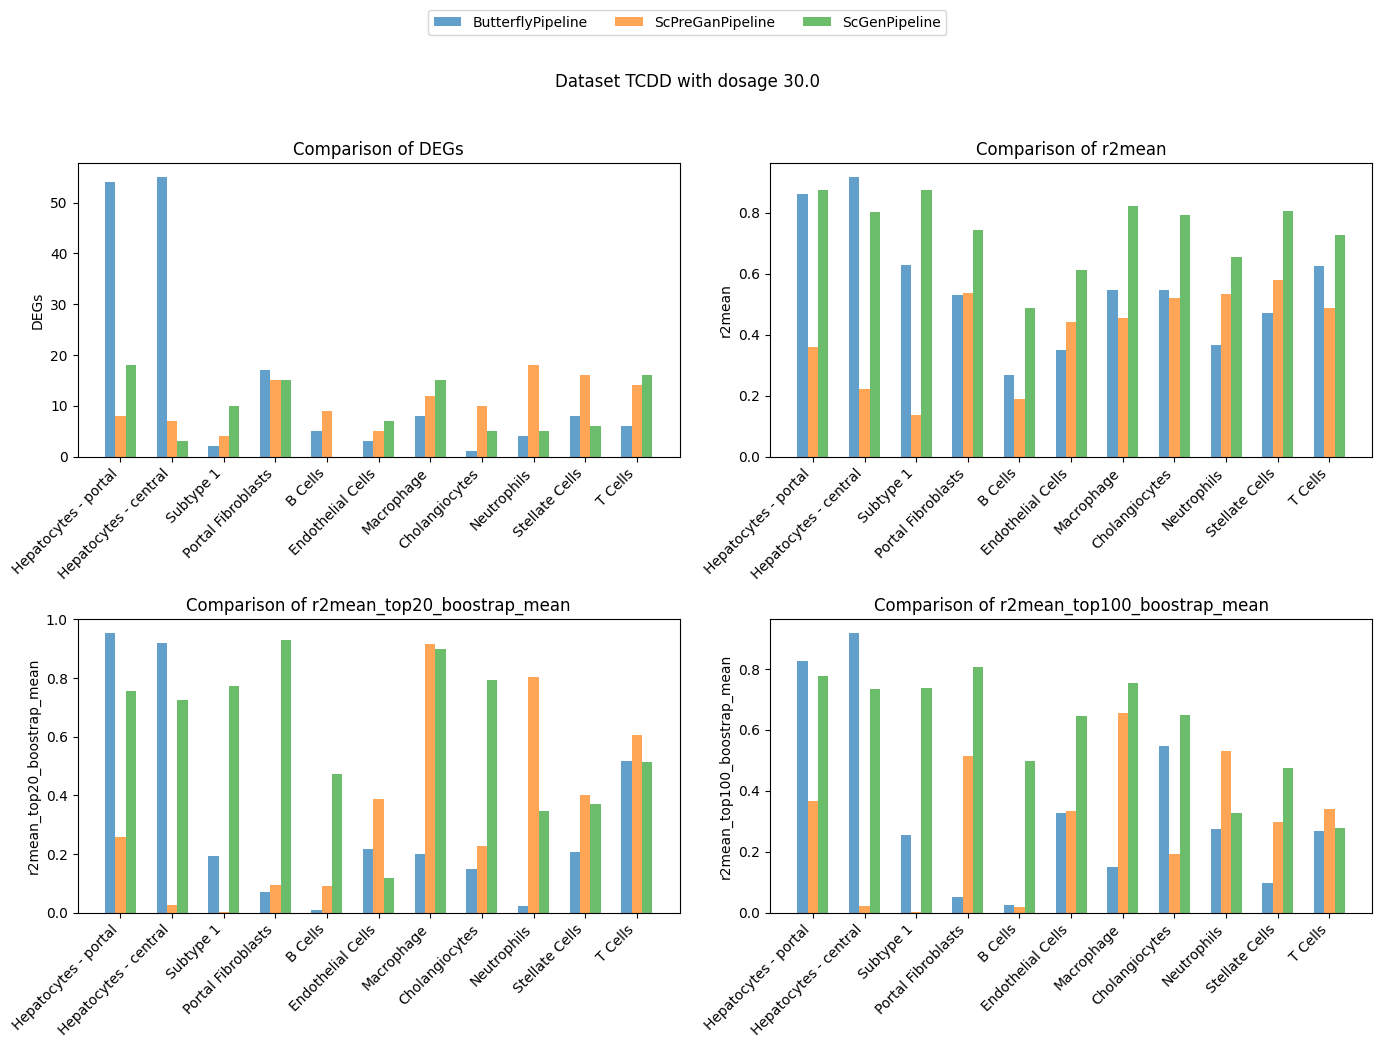

In [35]:
plot_metrics(df_nault_dosage30, 'Dataset TCDD with dosage 30.0')
